# Import Statements

In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

# Opening the File to see the list of parameters

### Pass 5.1

In [2]:
pass5file = '/home/rykore/pass5.1/2.63_3.45e-11_1000000_35_1.0_combined_rec.root'

with uproot.open(pass5file) as file:
    t = file['XCDF']
    t.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
rec.status           | uint64_t                 | AsDtype('>u8')
rec.version          | uint64_t                 | AsDtype('>u8')
rec.eventID          | uint64_t                 | AsDtype('>u8')
rec.runID            | uint64_t                 | AsDtype('>u8')
rec.timeSliceID      | uint64_t                 | AsDtype('>u8')
rec.trigger_flags    | uint64_t                 | AsDtype('>u8')
rec.event_flags      | uint64_t                 | AsDtype('>u8')
rec.gtc_flags        | uint64_t                 | AsDtype('>u8')
rec.gpsSec           | uint64_t                 | AsDtype('>u8')
rec.gpsNanosec       | uint64_t                 | AsDtype('>u8')
rec.nChTot           | uint64_t                 | AsDtype('>u8')
rec.nChAvail         | uint64_t                 | AsDtype('>u8')
rec.nHitTot          | uint64_t                 | AsDtype(

### Pass 4

In [3]:
pass4file = '/home/rykore/pass4/2.63_3.45e-11_1000000_0_1.0_combined_rec.root'

with uproot.open(pass4file) as file:
    t = file['XCDF']
    t.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
rec.nFit             | uint64_t                 | AsDtype('>u8')
rec.status           | uint64_t                 | AsDtype('>u8')
rec.version          | uint64_t                 | AsDtype('>u8')
rec.eventID          | uint64_t                 | AsDtype('>u8')
rec.runID            | uint64_t                 | AsDtype('>u8')
rec.timeSliceID      | uint64_t                 | AsDtype('>u8')
rec.trigger_flags    | uint64_t                 | AsDtype('>u8')
rec.event_flags      | uint64_t                 | AsDtype('>u8')
rec.gtc_flags        | uint64_t                 | AsDtype('>u8')
rec.gpsSec           | uint64_t                 | AsDtype('>u8')
rec.gpsNanosec       | uint64_t                 | AsDtype('>u8')
rec.nChTot           | uint64_t                 | AsDtype('>u8')
rec.nChAvail         | uint64_t                 | AsDtype(

# Redefining variables based on what is needed

### Pass 5.1

In [4]:
dset = dict()

with uproot.open(pass5file) as file:
    t = file['XCDF']
    dset["zenithAngle"] = t["rec.zenithAngle"].array(library="np")
    dset["azimuthAngle"] = t["rec.azimuthAngle"].array(library="np")
    dset["nHit"] = t["rec.nHit"].array(library="np")  # nHit > 75 - new cut
    dset["protonlheEnergy"] = t["rec.protonlheEnergy"].array(library="np")
    dset["PINC"] = t["rec.PINC"].array(library="np")
    dset["CxPE40XnCh"] = t["rec.CxPE40XnCh"].array(library="np") 
    dset["angleFitStatus"] = t["rec.angleFitStatus"].array(library="np")
    dset["coreFitStatus"] = t["rec.coreFitStatus"].array(library="np")
    # fit status of the reconstruction, 0 meaning successfull and != 0 means unsuccessful
    dset["cuts"] = np.logical_and(dset["angleFitStatus"] == 0, dset["coreFitStatus"] == 0)
    dset["corsikaParticleId"] = t["mc.corsikaParticleId"].array(library="np")
    dset["weights"] = t["sweets.IWgt"].array(library="np")
    # corsikaParticleId != 1 - Excludes gamma rays
    dset["cuts"] = np.logical_and(dset["cuts"] , dset["corsikaParticleId"]!=1 , dset["nHit"] > 75)
    dset["cuts"] = np.logical_and(dset["cuts"], dset["PINC"] > 1.2)
    dset["logEnergy"] = t["mc.logEnergy"].array(library="np")

In [5]:
initial_cuts_5 = dset["cuts"]
zenith_angle_5 = dset["zenithAngle"][initial_cuts_5]
log_E_5 = dset["logEnergy"][initial_cuts_5]
weights_5 = dset["weights"][initial_cuts_5]

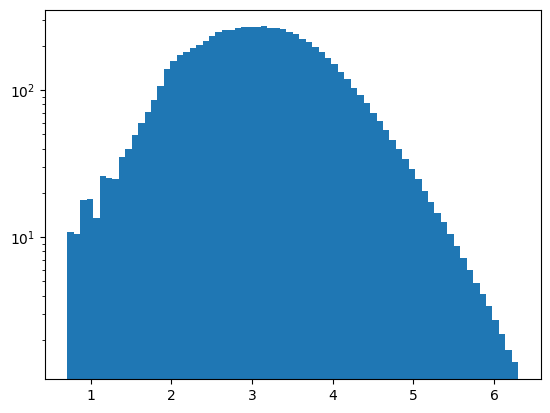

In [6]:
# adding weights - gives the simulated data a weight to make it closer to the actual data
plt.hist(log_E_5, bins = 70, log=True, weights = weights_5)
plt.show()

### Pass 4

In [7]:
dset = dict()

with uproot.open(pass4file) as file:
    t = file['XCDF']
    dset["zenithAngle"] = t["rec.zenithAngle"].array(library="np")
    dset["azimuthAngle"] = t["rec.azimuthAngle"].array(library="np")
    dset["nHit"] = t["rec.nHit"].array(library="np")  # nHit > 75 - new cut
    dset["protonlheEnergy"] = t["rec.protonlheEnergy"].array(library="np")
    dset["PINC"] = t["rec.PINC"].array(library="np")
    dset["CxPE40XnCh"] = t["rec.CxPE40XnCh"].array(library="np") 
    dset["angleFitStatus"] = t["rec.angleFitStatus"].array(library="np")
    dset["coreFitStatus"] = t["rec.coreFitStatus"].array(library="np")
    # fit status of the reconstruction, 0 meaning successfull and != 0 means unsuccessful
    dset["cuts"] = np.logical_and(dset["angleFitStatus"] == 0, dset["coreFitStatus"] == 0)
    dset["corsikaParticleId"] = t["mc.corsikaParticleId"].array(library="np")
    dset["weights"] = t["sweets.IWgt"].array(library="np")
    # corsikaParticleId != 1 - Excludes gamma rays
    dset["cuts"] = np.logical_and(dset["cuts"] , dset["corsikaParticleId"]!=1 , dset["nHit"] > 75)
    dset["cuts"] = np.logical_and(dset["cuts"], dset["PINC"] > 1.2)
    dset["logEnergy"] = t["mc.logEnergy"].array(library="np")

In [8]:
initial_cuts_4 = dset["cuts"]
zenith_angle_4 = dset["zenithAngle"][initial_cuts_4]
log_E_4 = dset["logEnergy"][initial_cuts_4]
weights_4 = dset["weights"][initial_cuts_4]

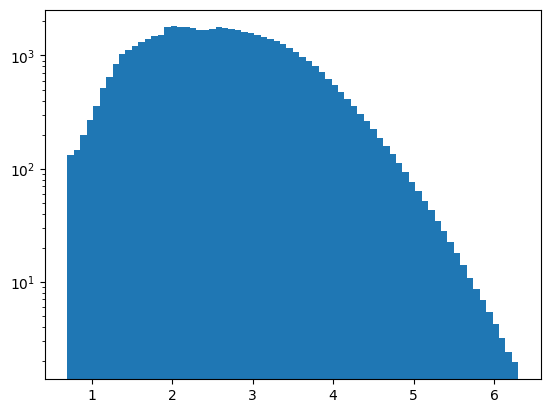

In [9]:
# adding weights - gives the simulated data a weight to make it closer to the actual data
plt.hist(log_E_4, bins = 70, log=True, weights = weights_4)
plt.show()

# Cutting and binning the Energy

In [10]:
# cuts for pass 5.1
cut1_5 = np.logical_and(log_E_5 >= np.log(1),log_E_5 < np.log(10))
cut2_5 = np.logical_and(log_E_5 >= np.log(10),log_E_5 < np.log(30))
cut3_5 = np.logical_and(log_E_5 >= np.log(30),log_E_5 < np.log(50))
cut4_5 = np.logical_and(log_E_5 >= np.log(50),log_E_5 <= np.log(70))
cut5_5 = log_E_5 > np.log(70)

In [11]:
# cuts for pass 4
cut1_4 = np.logical_and(log_E_4 >= np.log(1),log_E_4 < np.log(10))
cut2_4 = np.logical_and(log_E_4 >= np.log(10),log_E_4 < np.log(30))
cut3_4 = np.logical_and(log_E_4 >= np.log(30),log_E_4 < np.log(50))
cut4_4 = np.logical_and(log_E_4 >= np.log(50),log_E_4 <= np.log(70))
cut5_4 = log_E_4 > np.log(70)

### Pass 5.1

In [12]:
energy_cut1_5 = log_E_5[cut1_5]
energy_cut2_5 = log_E_5[cut2_5]
energy_cut3_5 = log_E_5[cut3_5]
energy_cut4_5 = log_E_5[cut4_5]
energy_cut5_5 = log_E_5[cut5_5]

energies_5 = [energy_cut1_5, energy_cut2_5, energy_cut3_5, energy_cut4_5, energy_cut5_5]

In [13]:
weights_cut1_5 = weights_5[cut1_5]
weights_cut2_5 = weights_5[cut2_5]
weights_cut3_5 = weights_5[cut3_5]
weights_cut4_5 = weights_5[cut4_5]
weights_cut5_5 = weights_5[cut5_5]

weights_array_5 = [weights_cut1_5, weights_cut2_5, weights_cut3_5, weights_cut4_5, weights_cut5_5]

In [14]:
zenith_cut1_5 = zenith_angle_5[cut1_5]
zenith_cut2_5 = zenith_angle_5[cut2_5]
zenith_cut3_5 = zenith_angle_5[cut3_5]
zenith_cut4_5 = zenith_angle_5[cut4_5]
zenith_cut5_5 = zenith_angle_5[cut5_5]

zenith_array_5 = [zenith_cut1_5, zenith_cut2_5, zenith_cut3_5, zenith_cut4_5, zenith_cut5_5]

### Pass 4

In [15]:
energy_cut1_4 = log_E_4[cut1_4]
energy_cut2_4 = log_E_4[cut2_4]
energy_cut3_4 = log_E_4[cut3_4]
energy_cut4_4 = log_E_4[cut4_4]
energy_cut5_4 = log_E_4[cut5_4]

energies_4 = [energy_cut1_4, energy_cut2_4, energy_cut3_4, energy_cut4_4, energy_cut5_4]

In [16]:
weights_cut1_4 = weights_4[cut1_4]
weights_cut2_4 = weights_4[cut2_4]
weights_cut3_4 = weights_4[cut3_4]
weights_cut4_4 = weights_4[cut4_4]
weights_cut5_4 = weights_4[cut5_4]

weights_array_4 = [weights_cut1_4, weights_cut2_4, weights_cut3_4, weights_cut4_4, weights_cut5_4]

In [17]:
zenith_cut1_4 = zenith_angle_4[cut1_4]
zenith_cut2_4 = zenith_angle_4[cut2_4]
zenith_cut3_4 = zenith_angle_4[cut3_4]
zenith_cut4_4 = zenith_angle_4[cut4_4]
zenith_cut5_4 = zenith_angle_4[cut5_4]

zenith_array_4 = [zenith_cut1_4, zenith_cut2_4, zenith_cut3_4, zenith_cut4_4, zenith_cut5_4]

# Weighted Quantile function
#### input:
values = log_E  \
quantiles = \[0.159, 0.841\] (array of what quantiles of the data you need) \
sample_weight = weights (apply cuts on weights as well so that the dimensions of both the arrays remain the same) \
values_sorted (if False, will sort the returned array)
#### output:
an interpolated array having the same dimensions as the quantiles array from the input that has the weighted values in the data at those specified quantiles

In [18]:
def weighted_quantile(values, quantiles, sample_weight=None, 
                      values_sorted=False, old_style=False):
    """ 
    Very close to numpy.percentile, but supports weights.
    NOTE: quantiles should be in [0, 1]!

    :param values: numpy.array with data
    :param quantiles: array-like with many quantiles needed
    :param sample_weight: array-like of the same length as `array`
    :param values_sorted: bool, if True, then will avoid sorting of
        initial array
    :param old_style: if True, will correct output to be consistent
        with numpy.percentile.
    :return: numpy.array with computed quantiles.

    """
    values = np.array(values)
    quantiles = np.array(quantiles)
    if sample_weight is None:
        sample_weight = np.ones(len(values))
    sample_weight = np.array(sample_weight)
    assert np.all(quantiles >= 0) and np.all(quantiles <= 1), \
        'quantiles should be in [0, 1]'

    if not values_sorted:
        sorter = np.argsort(values)
        values = values[sorter]
        sample_weight = sample_weight[sorter]

    weighted_quantiles = np.cumsum(sample_weight) - 0.5 * sample_weight
    if old_style:
        # To be convenient with numpy.percentile
        weighted_quantiles -= weighted_quantiles[0]
        weighted_quantiles /= weighted_quantiles[-1]
    else:
        weighted_quantiles /= np.sum(sample_weight)
    return np.interp(quantiles, weighted_quantiles, values)

# Binning the zenith angle

In [19]:
# 180 degrees divided into 18 bins with each bin being 10 degrees
deltaz = np.radians(5)
zbins = np.arange(min(zenith_angle_5),np.radians(70), deltaz)
print(zbins)

[2.00000000e-04 8.74664626e-02 1.74732925e-01 2.61999388e-01
 3.49265850e-01 4.36532313e-01 5.23798776e-01 6.11065238e-01
 6.98331701e-01 7.85598163e-01 8.72864626e-01 9.60131089e-01
 1.04739755e+00 1.13466401e+00]


# Plotting the average energy vs zenith angle

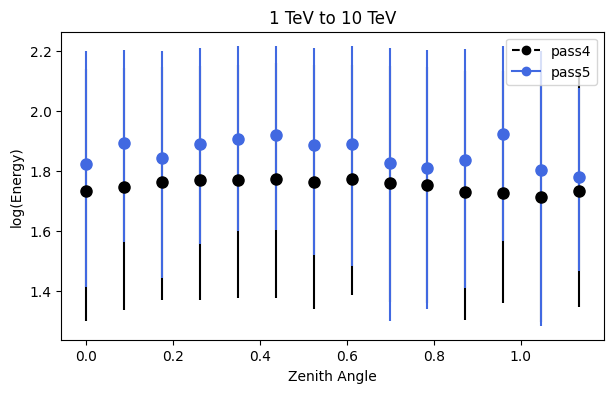

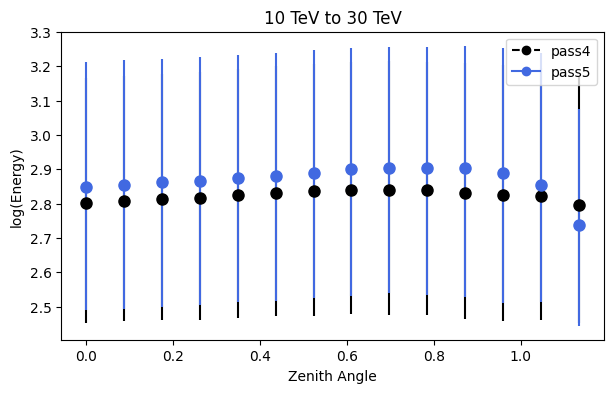

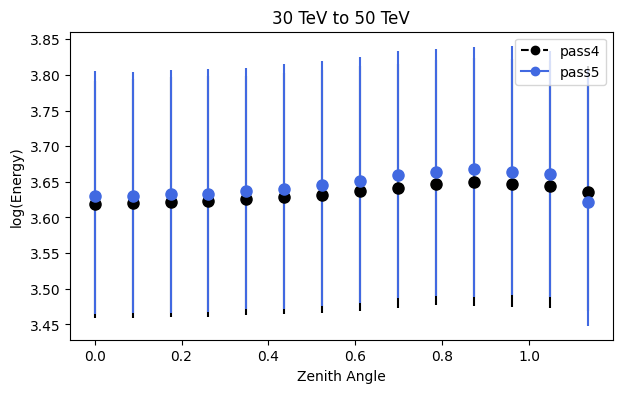

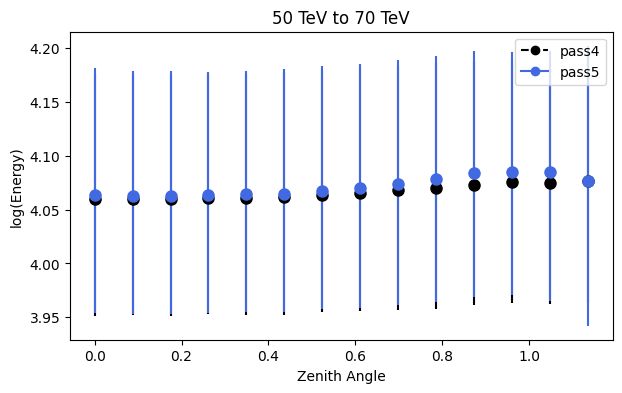

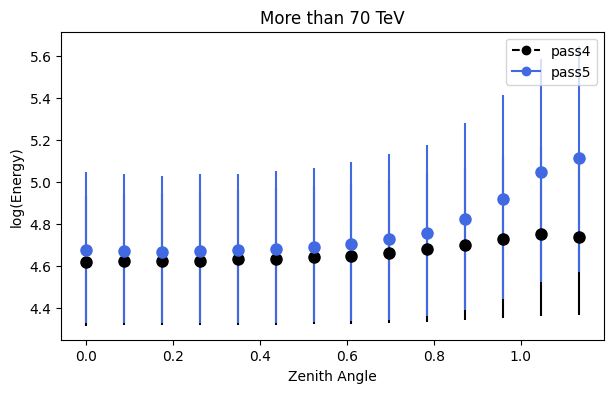

In [20]:
energies = [energies_4, energies_5]
weights_array = [weights_array_4, weights_array_5]
zenith_array = [zenith_array_4, zenith_array_5]
colors = ['black', 'royalblue']
titles = ['1 TeV to 10 TeV', '10 TeV to 30 TeV', '30 TeV to 50 TeV', '50 TeV to 70 TeV', 'More than 70 TeV']

for i in range(5):  # Loop over the 5 cuts
    fig, ax = plt.subplots(figsize=(7, 4))

    for j, (energy_set, weight_set, zenith_set, color) in enumerate(zip(energies, weights_array, zenith_array, colors)):
        energy = energy_set[i]
        weight = weight_set[i]
        zenith = zenith_set[i]

        for z in zbins:
            zmin = z
            zmax = z + deltaz
            zcut = np.logical_and(zenith >= zmin, zenith <= zmax)

            if not sum(weight[zcut] > 0):
                continue

            avg_energy = np.average(energy[zcut], weights=weight[zcut])
            upper_quantile = weighted_quantile(energy[zcut], 0.841, sample_weight=weight[zcut])
            lower_quantile = weighted_quantile(energy[zcut], 0.159, sample_weight=weight[zcut])

            err_upper = upper_quantile - avg_energy
            err_lower = avg_energy - lower_quantile

            ax.errorbar(z, avg_energy, yerr=[[err_lower], [err_upper]], fmt='o', markersize=8, color=color, label=f'pass{4+j}' if z == zbins[0] else "")

    ax.set_xlabel('Zenith Angle')
    ax.set_ylabel('log(Energy)')
    ax.set_title(titles[i])
    
    proxy_pass4 = plt.Line2D([0], [0], linestyle='--', marker='o', color=colors[0])
    proxy_pass5 = plt.Line2D([0], [0], linestyle='-', marker='o', color=colors[1])
    ax.legend([proxy_pass4, proxy_pass5], ['pass4', 'pass5'])
    
    plt.show()

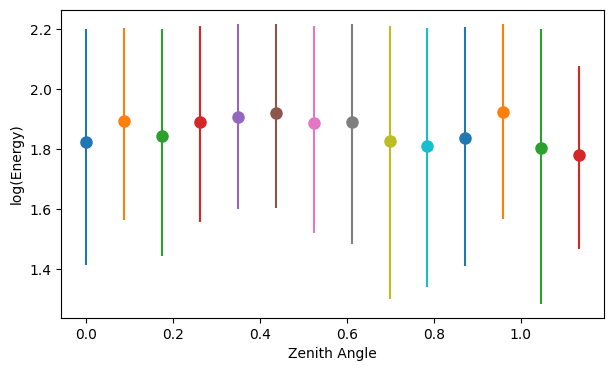

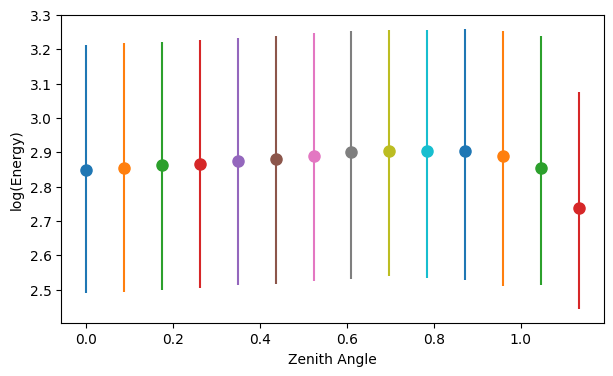

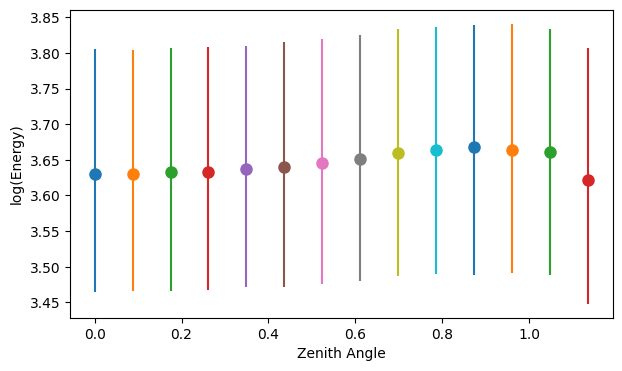

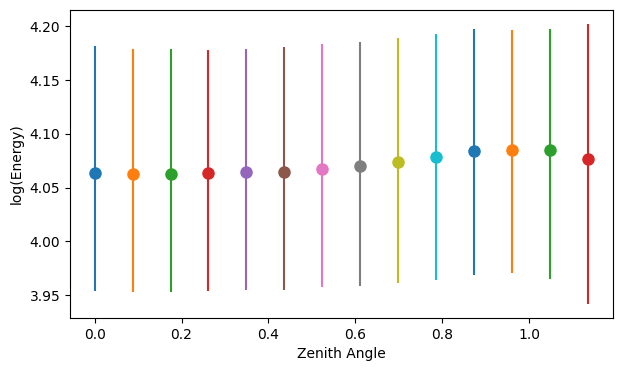

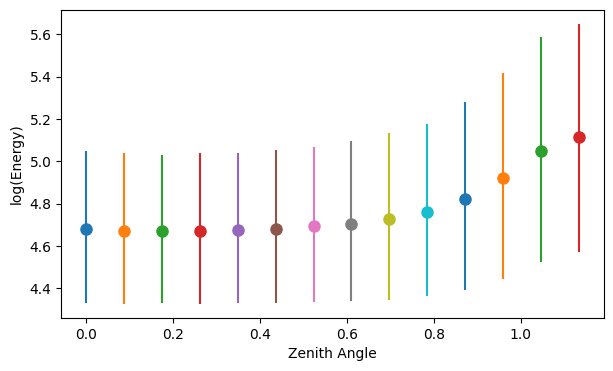

In [21]:
for energy, weight, zenith in zip(energies_5, weights_array_5, zenith_array_5):
    
    fig, ax = plt.subplots(figsize=(7, 4))
    
    for z in zbins:
        zmin = z
        zmax = z + deltaz
        zcut = np.logical_and(zenith >= zmin, zenith <= zmax)

        if not sum(weight[zcut] > 0):
            continue
            
        avg_energy = np.average(energy[zcut], weights = weight[zcut])
        
        upper_quantile = weighted_quantile(energy[zcut], 0.841 , sample_weight = weight[zcut])
        lower_quantile = weighted_quantile(energy[zcut], 0.159 , sample_weight = weight[zcut])

        err_upper = upper_quantile - avg_energy
        err_lower = avg_energy - lower_quantile
        
        ax.errorbar(z, avg_energy, yerr = [[err_lower], [err_upper]] , fmt = 'o', markersize = 8)

    plt.xlabel('Zenith Angle')
    plt.ylabel('log(Energy)')
    plt.show()

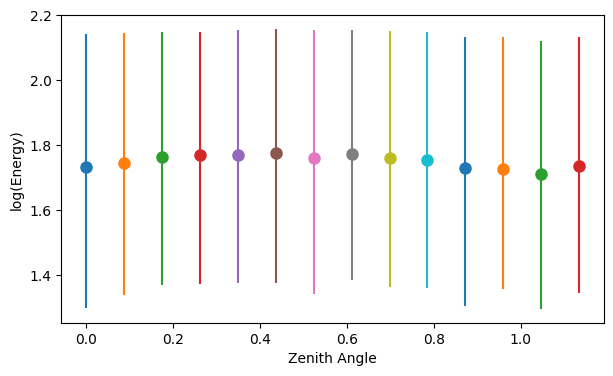

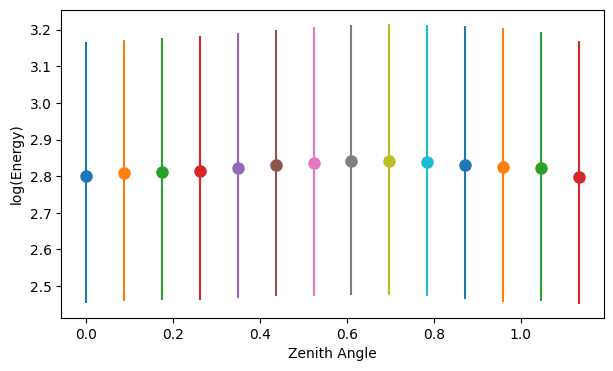

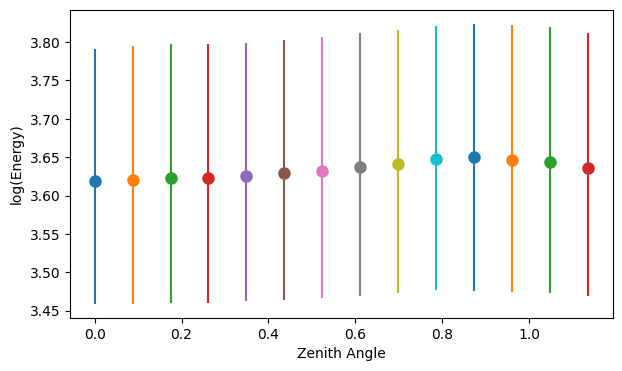

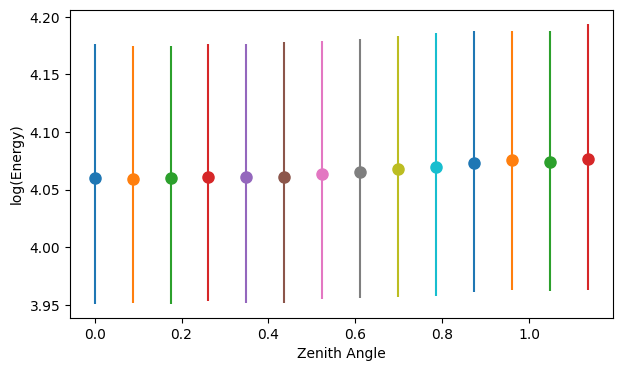

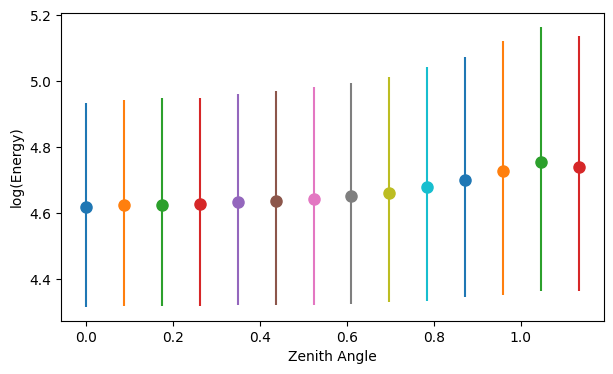

In [22]:
for energy, weight, zenith in zip(energies_4, weights_array_4, zenith_array_4):
    
    fig, ax = plt.subplots(figsize=(7, 4))
    
    for z in zbins:
        zmin = z
        zmax = z + deltaz
        zcut = np.logical_and(zenith >= zmin, zenith <= zmax)

        if not sum(weight[zcut] > 0):
            continue
            
        avg_energy = np.average(energy[zcut], weights = weight[zcut])
        
        upper_quantile = weighted_quantile(energy[zcut], 0.841 , sample_weight = weight[zcut])
        lower_quantile = weighted_quantile(energy[zcut], 0.159 , sample_weight = weight[zcut])

        err_upper = upper_quantile - avg_energy
        err_lower = avg_energy - lower_quantile
        
        ax.errorbar(z, avg_energy, yerr = [[err_lower], [err_upper]] , fmt = 'o', markersize = 8)

    plt.xlabel('Zenith Angle')
    plt.ylabel('log(Energy)')
    plt.show()

In [25]:
g1 = -2.52
g2 = -2.71
E0 = 3.87e4
eps = 3
def func(E):
    y = g1 + (g2 - g1)*((((E)/E0)**eps)/(1 + ((E)/E0)**eps))
    return y

In [26]:
specind = func(10**(log_E_5))

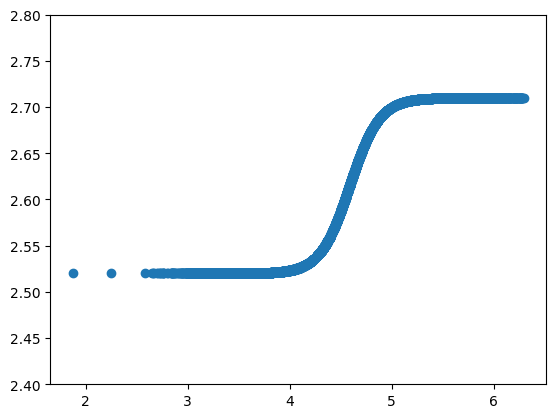

In [33]:
plt.scatter(log_E_5[:10000], np.abs(specind)[:10000])
# plt.fill_between(log_E_5[:10000], 1 , alpha = 0.3)
plt.ylim(2.4, 2.8)
plt.show()

In [23]:
def func(e, gamma1, gamma2, e_o, epsilon):
    y = gamma1 + ((gamma2 - gamma1) * (((e/e_o)**epsilon) / (1 + ((e/e_o)**epsilon))))
    return y